In [45]:
pip install wordcloud

In [46]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
from wordcloud import WordCloud ,STOPWORDS , ImageColorGenerator

In [47]:
data = pd.read_csv("Instagram.csv",encoding ="latin1")

In [48]:
data.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [49]:
data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [50]:
data = data.dropna()

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


# ANALYZING INSTAGRAM REACH 

C:\Users\HP\AppData\Local\Temp\ipykernel_7540\715831406.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




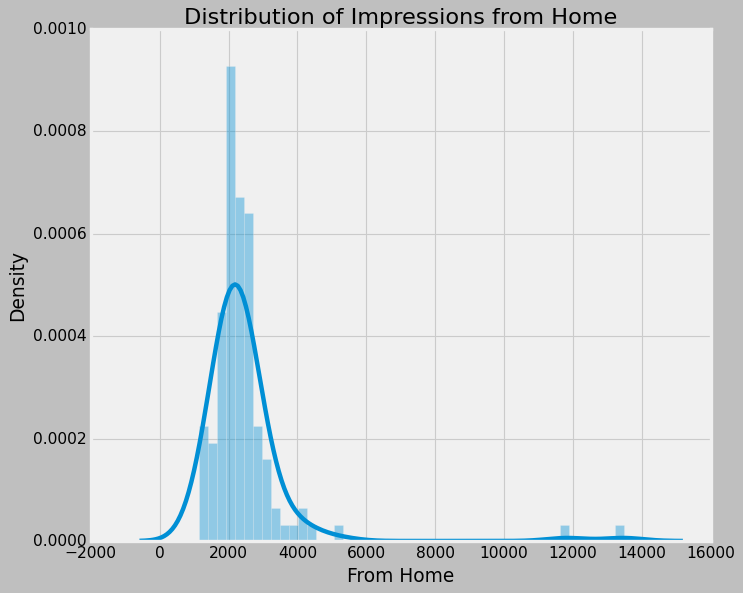

In [52]:
plt.figure(figsize =(10,8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions from Home")
sns.distplot(data['From Home'])
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_7540\711821527.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




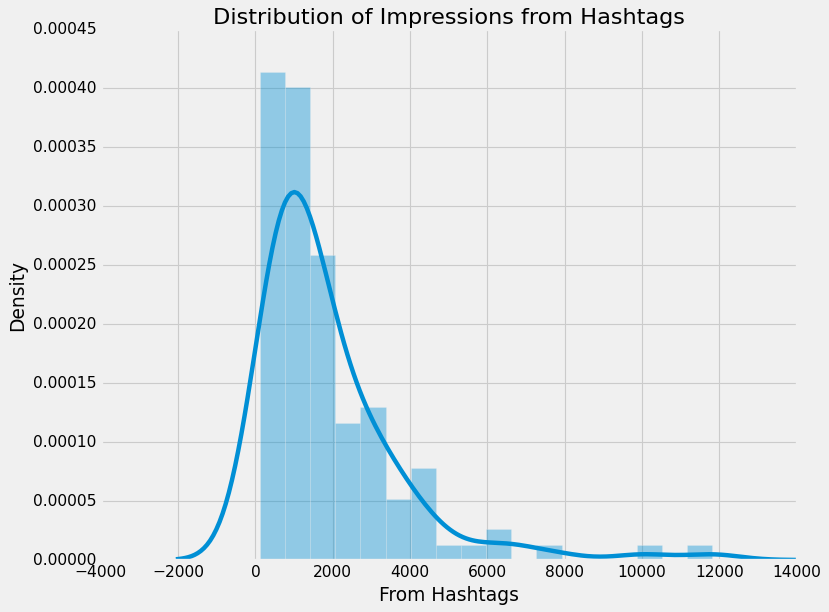

In [53]:
plt.figure(figsize =(10,8))
plt.title("Distribution of Impressions from Hashtags")
sns.distplot(data['From Hashtags'])
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_7540\4065446931.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




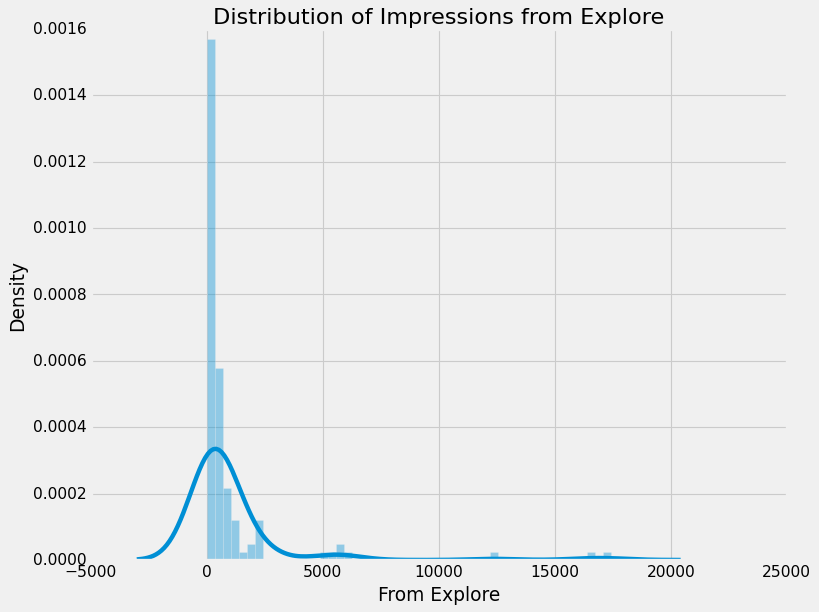

In [54]:
plt.figure(figsize =(10,8))
plt.title("Distribution of Impressions from Explore")
sns.distplot(data['From Explore'])
plt.show()

In [55]:
home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

In [56]:
labels =["From Home","From Hashtags","From Explore","From Other"]
values = [home,hashtags,explore,other]

In [57]:
fig = px.pie(data,values = values,names = labels,title = "Impression on Instagram Posts From Various Sources",hole =0.5)
fig.show()

# ANALYZING THE CONTENT 

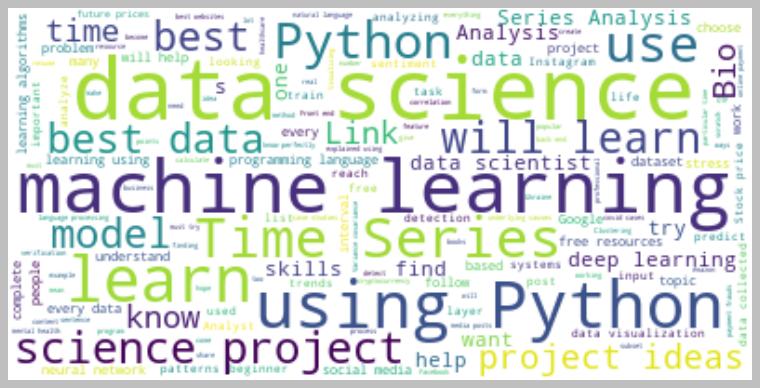

In [58]:
text =" ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud =WordCloud(stopwords = stopwords,background_color ="white").generate(text)
plt.style.use("classic")
plt.figure(figsize =(12,10))
plt.imshow(wordcloud,interpolation ='bilinear')
plt.axis("off")
plt.show()

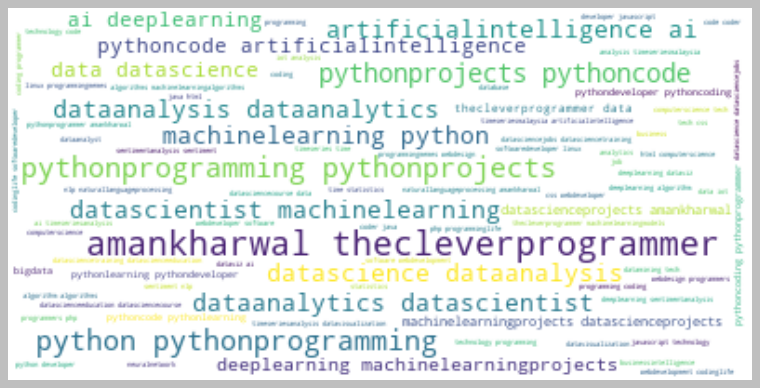

In [59]:
text =" ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud =WordCloud(stopwords = stopwords,background_color ="white").generate(text)
plt.style.use("classic")
plt.figure(figsize =(12,10))
plt.imshow(wordcloud,interpolation ='bilinear')
plt.axis("off")
plt.show()

# ANALYZING RELATIONSHIPS OTHER 

In [60]:
# Relationship between no. of columns and no. of impressions 
figure = px.scatter(data_frame =data,x = "Impressions",y="Likes",size ="Likes",trendline ="ols",title= "Relationship Between Likes and Impressions")
figure.show()

In [61]:
# Relationship between no. of columns and no. of impressions 
figure = px.scatter(data_frame =data,x = "Impressions",y="Comments",size ="Comments",trendline ="ols",title= "Relationship Between Comments and Impressions")
figure.show()

In [62]:
# Relationship between no. of  Shares and no. of impressions 
figure = px.scatter(data_frame =data,x = "Impressions",y="Shares",size ="Shares",trendline ="ols",title= "Relationship Between Shares and Impressions")
figure.show()

In [63]:
# Relationship between no. of  Saves and no. of impressions 
figure = px.scatter(data_frame =data,x = "Impressions",y="Saves",size ="Saves",trendline ="ols",title= "Relationship Between Saves and Impressions")
figure.show()

# CORRELATION ANALYSIS 

In [64]:
correlation = data.corr()


C:\Users\HP\AppData\Local\Temp\ipykernel_7540\2153533308.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [65]:
correlation["Impressions"].sort_values(ascending = False)

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64

# ANALYZING CONVERSION RATE 

In [66]:
conversion_rate =(data["Follows"].sum()/data["Profile Visits"].sum())*100

In [67]:
conversion_rate

41.00265604249668

In [68]:
# Relationship between no. of  Profile Visits and no. of Followers Gained 
figure = px.scatter(data_frame =data,x = "Profile Visits",y="Follows",size ="Follows",trendline ="ols",title= "Relationship Between Profile Visits and Followers Gained")
figure.show()

# SPLITTING DATASET

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

In [70]:
x = np.array(data[["Likes","Saves","Comments","Shares","Profile Visits","Follows"]])
y = np.array(data["Impressions"])

In [71]:
xtrain ,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [72]:
model = PassiveAggressiveRegressor()

In [73]:
model.fit(xtrain,ytrain)

PassiveAggressiveRegressor()

In [74]:
model.score(xtest,ytest)

0.8432696621298315

In [75]:
# Features = [["likes","Saves","Comments","Shares","Profile Visits","Follows"]]
features = np.array([[282.0,233.0,4.0,9.0,165.0,54.0]])
model.predict(features)

array([10620.21901117])